In [1]:
# Uses python3
import numpy as np
import xarray
import matplotlib.pyplot as plt
import cmocean
import matplotlib
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


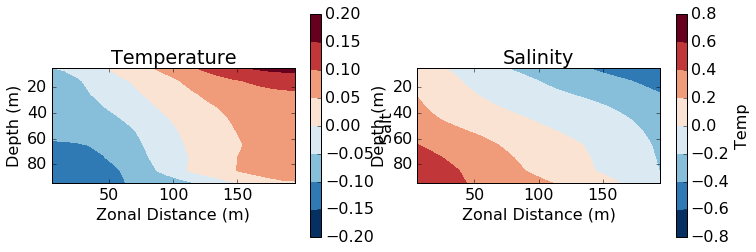

In [2]:
initial_z = xarray.open_dataset('linear_TS/Initial_state.nc', decode_times = False).mean(dim='lath')
initial_z.load()
initial_z.rename( { 'Temp':'temp', 'Salt':'salt', 'Layer':'zl', 'lonh':'xh' }, inplace=True )
linear_z = xarray.open_dataset('linear_TS/prog.nc', decode_times = False).mean(dim='yh')
linear_z.load()
rename_vars = {'xh':'Zonal Distance (m)', 'zl':'Depth (m)', 'temp':'Temp','salt':'Salt'}
initial_z.rename(rename_vars,inplace=True)
linear_z.rename(rename_vars,inplace=True)

plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1)
(initial_z.Salt[0,:,:]-linear_z.Salt[-1,:,:]).plot.contourf(levels=10); plt.gca().invert_yaxis();ax.set(adjustable='box-forced', aspect='equal')
plt.title('Temperature')
ax = plt.subplot(1,2,2)
(initial_z.Temp[0,:,:]-linear_z.Temp[-1,:,:]).plot.contourf(levels=10); plt.gca().invert_yaxis();ax.set(adjustable='box-forced', aspect='equal')
plt.title('Salinity')


/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


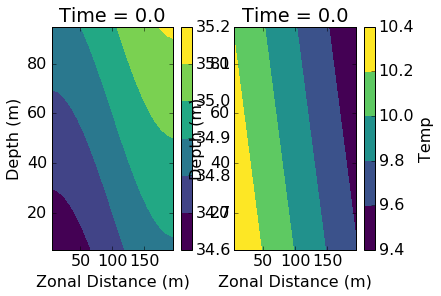

In [3]:
plt.subplot(1,2,1)
initial_z.Salt[0,:,:].plot.contourf()
plt.subplot(1,2,2)
initial_z.Temp[0,:,:].plot.contourf()

In [4]:
linear_z

<xarray.Dataset>
Dimensions:             (Depth (m): 10, Time: 100, Zonal Distance (m): 20, xq: 20, yq: 4, zi: 11)
Coordinates:
  * xq                  (xq) float64 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 ...
  * Depth (m)           (Depth (m)) float64 5.0 15.0 25.0 35.0 45.0 55.0 ...
  * Time                (Time) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 ...
  * Zonal Distance (m)  (Zonal Distance (m)) float64 5.0 15.0 25.0 35.0 45.0 ...
  * yq                  (yq) float64 10.0 20.0 30.0 40.0
  * zi                  (zi) float64 0.0 10.0 20.0 30.0 40.0 50.0 60.0 70.0 ...
Data variables:
    u                   (Time, Depth (m), xq) float32 0.0309632 0.0469282 ...
    v                   (Time, Depth (m), yq, Zonal Distance (m)) float32 0.0 ...
    h                   (Time, Depth (m), Zonal Distance (m)) float64 10.0 ...
    e                   (Time, zi, Zonal Distance (m)) float64 0.003057 ...
    Temp                (Time, Depth (m), Zonal Distance (m)) float64 10.36 ...
    Sa

/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.

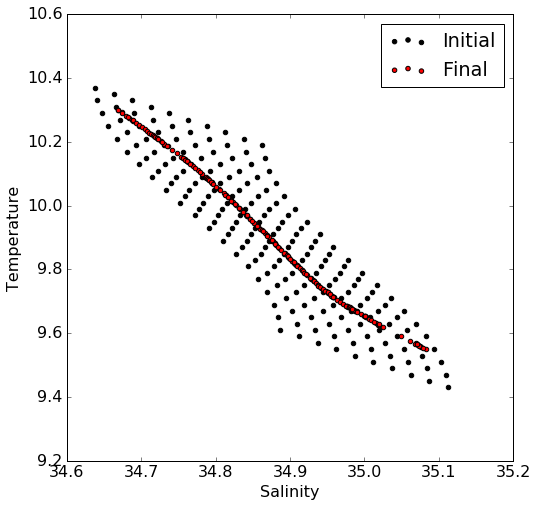

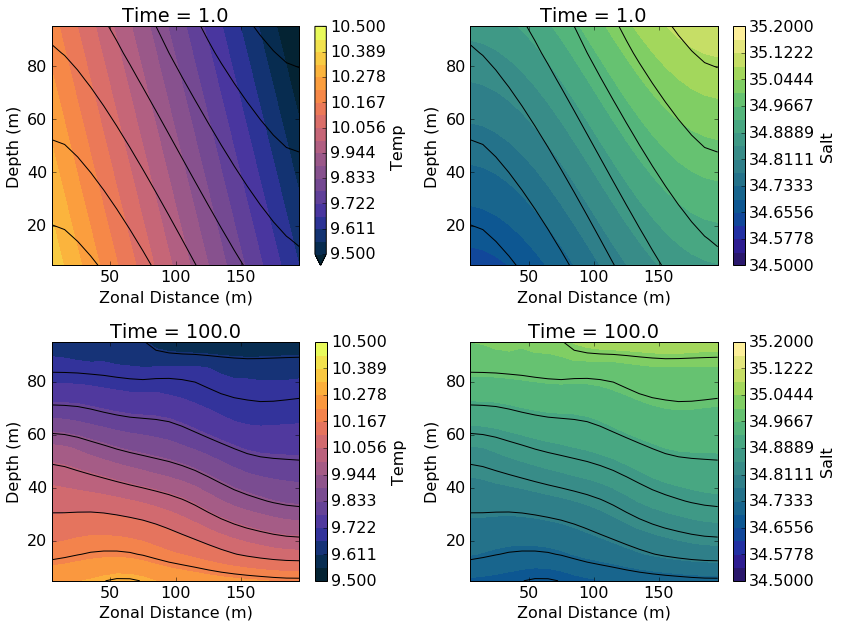

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(initial_z.Salt,initial_z.Temp,s=20.,c='k',label='Initial')
plt.scatter(linear_z.Salt[-1,:,:],linear_z.Temp[-1,:,:],s=20.,c='r',label='Final')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.legend()
# plt.gca().set(adjustable='box-forced', aspect='equal')

smin = 34.5 ; smax = 35.2
tmin = 9.5 ; tmax = 10.5

salt_opts = { 'levels':19, 'vmin':smin, 'vmax':smax, 'cmap':cmocean.cm.haline }
temp_opts = { 'levels':19, 'vmin':tmin, 'vmax':tmax, 'cmap':cmocean.cm.thermal }

plt.figure(figsize=(12,9))
idx = 1
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(initial_z.Temp[0,:,:],**temp_opts); plt.gca().invert_yaxis()
linear_z['rhoinsitu'][0,...].plot.contour(colors='k',levels=10)
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(initial_z.Salt[0,:,:],**salt_opts); plt.gca().invert_yaxis()
linear_z['rhoinsitu'][0,...].plot.contour(colors='k',levels=10)
plt.tight_layout()
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(linear_z.Temp[-1,:,:],**temp_opts); plt.gca().invert_yaxis()
linear_z['rhoinsitu'][-1,...].plot.contour(colors='k',levels=10)
plt.subplot(2,2,idx); idx += 1
xarray.plot.contourf(linear_z.Salt[-1,:,:],**salt_opts); plt.gca().invert_yaxis()
linear_z['rhoinsitu'][-1,...].plot.contour(colors='k',levels=10)

plt.tight_layout()


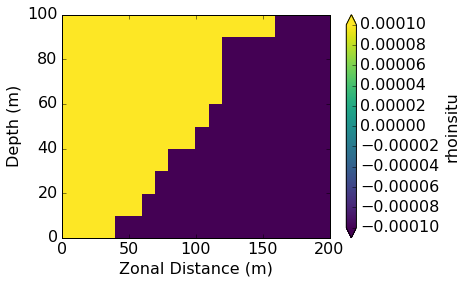

In [6]:
(linear_z['rhoinsitu'][-1,...]-linear_z['rhoinsitu'][0,...]).plot(vmin = -0.0001,vmax = 0.0001)